<a href="https://colab.research.google.com/github/LunaTic-Neon/2025-2-DLAP/blob/main/25_2_1010_DLAP_6%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-means clustering 실습  

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/sample_data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
categorical_features = ['Channel', 'Region']
cotinuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
                      'Delicassen']

for col in categorical_features:
  dummies = pd.get_dummies(data[col], prefix=col)
  data = pd.concat([data, dummies], axis=1)
  data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [4]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

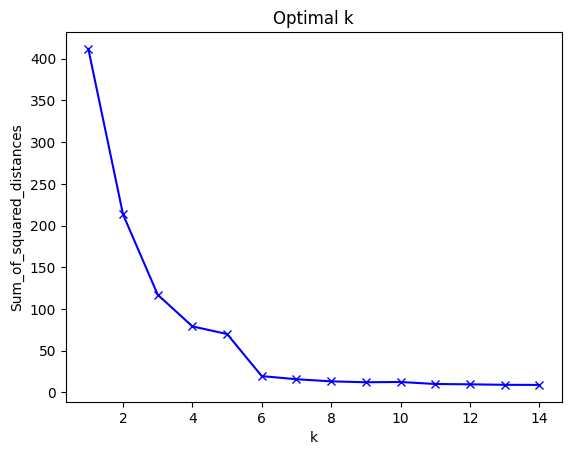

In [5]:
Sum_of_squred_distances = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_transformed)
  Sum_of_squred_distances.append(km.inertia_)

plt.plot(K, Sum_of_squred_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

## PCA + DBSCAN 실습

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [7]:
X = pd.read_csv('/content/sample_data/credit card.csv')
X = X.drop('CUST_ID', axis=1)
X.fillna(method='ffill', inplace=True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

/tmp/ipython-input-2352771118.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


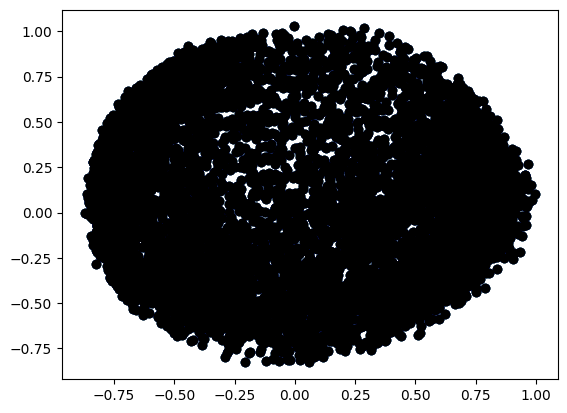

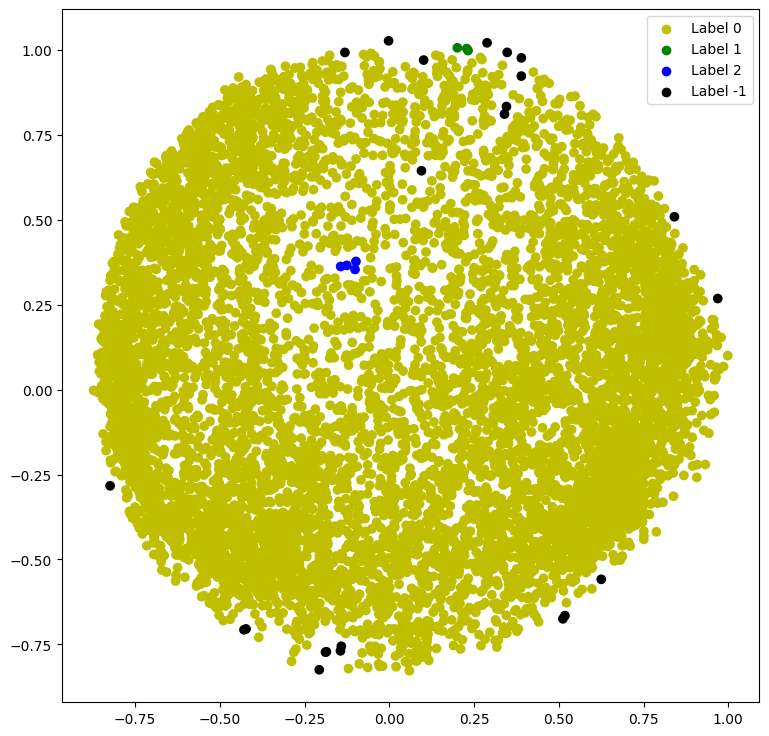

In [9]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)
labels = db_default.labels_

colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g')
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k')

plt.figure(figsize=(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

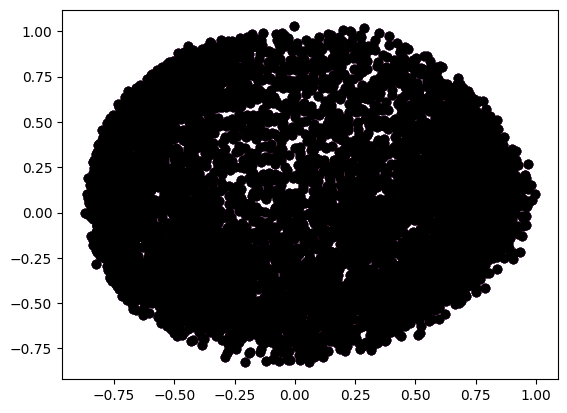

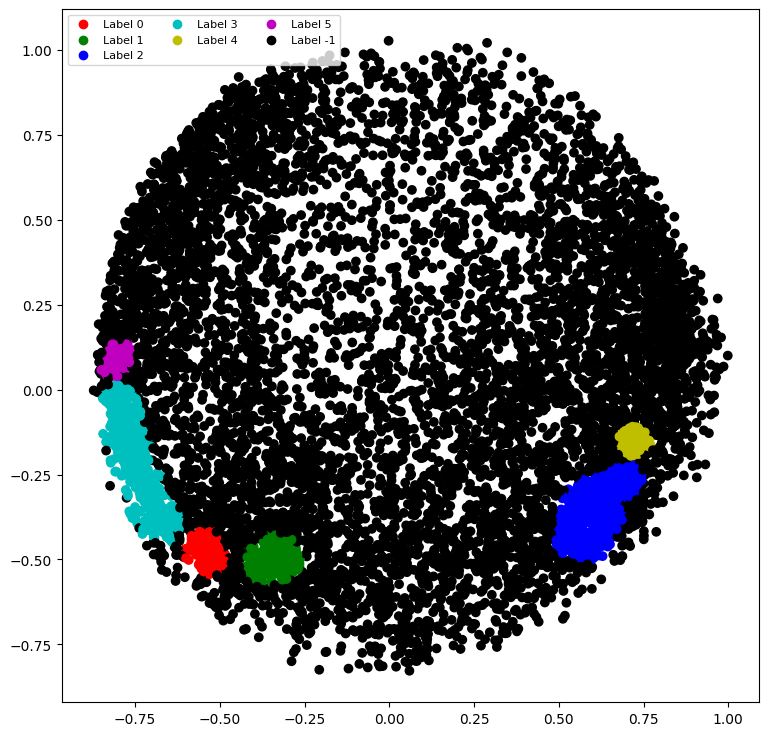

In [11]:
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2',
            'Label 3', 'Label 4', 'Label 5', 'Label -1'),
            scatterpoints=1,
            loc='upper left',
            ncol=3,
            fontsize=8)
plt.show()

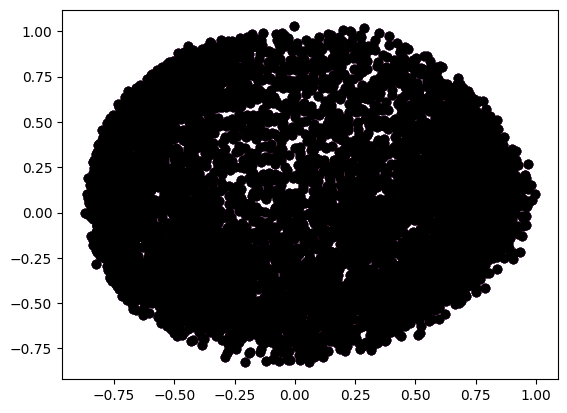

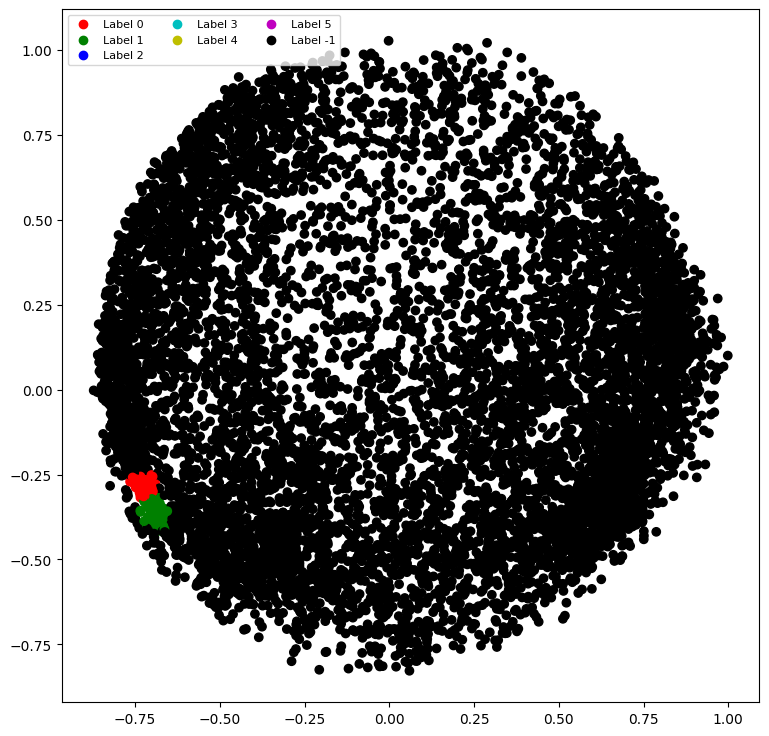

In [13]:
db = DBSCAN(eps=0.0375, min_samples=100).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2',
            'Label 3', 'Label 4', 'Label 5', 'Label -1'),
            scatterpoints=1,
            loc='upper left',
            ncol=3,
            fontsize=8)
plt.show()